# Exploratory Data Analysis: Movie Revenue over Time

### Libraries to import:

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("muted")
%matplotlib inline

### Import Data:

In [104]:
data = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


### Cleaning Data:

#### Changing Release Date to Year: 

In [105]:
data['Release_Year'] = pd.DatetimeIndex(data['release_date']).year

#### Recasting Worldwide Gross as an Integer:

In [106]:
data.worldwide_gross.dtype

dtype('O')

In [107]:
data['worldwide_gross'] = data['worldwide_gross'].str.strip('$')
data['worldwide_gross'] = data['worldwide_gross'].str.replace(',', '')
data['worldwide_gross'] = data['worldwide_gross'].astype('int64')

In [108]:
data.worldwide_gross.dtype

dtype('int64')

#### Re-examine our data:

In [109]:
data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Release_Year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",1045663875,2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350",149762350,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1403013963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382",1316721747,2017
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,0,2018
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482",240495,1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338",1338,2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,0,2015


### Visualization: 

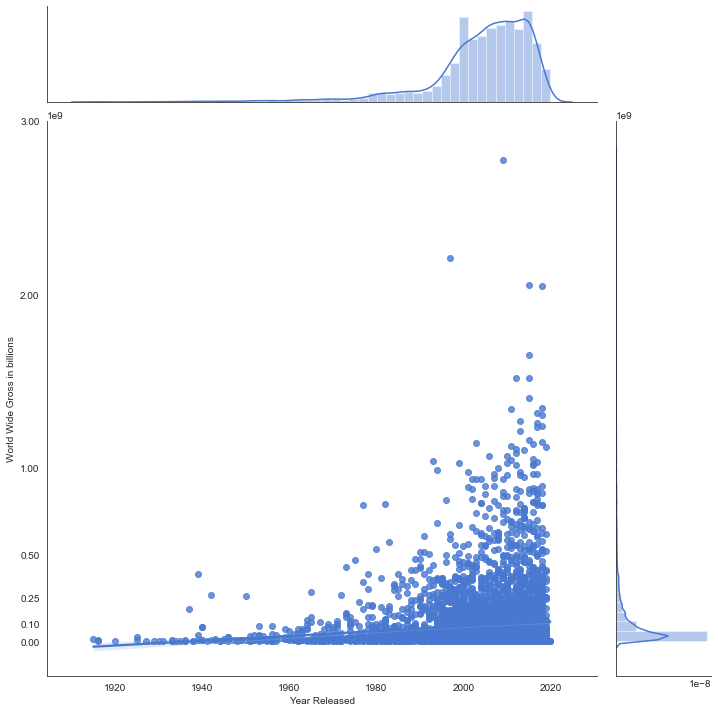

In [129]:
graph = sns.jointplot(x = 'Release_Year', y = 'worldwide_gross', data = data, kind = 'reg', height = 10)
graph.set_axis_labels('Year Released', 'World Wide Gross in billions')
graph.ax_joint.set_yticks([0, 100000000, 250000000, 500000000, 1000000000, 2000000000, 3000000000])
sns.despine()

### Insights:

There has been a drastic increase in the potential earnings from a feature film, especially in the last twenty years. A handful of films have worldwide earnings of more than 1.5 billion dollars. However, the vast majority of films have earned less than 100 million.